In [1]:
import os
import pandas as pd
import networkx as nx

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
data_dir = "./webcrawl"

In [12]:
data_location = os.path.expanduser(os.path.join(data_dir, "data.csv"))

In [13]:
dt = pd.read_csv(data_location)

In [14]:
dt.head()

,from_hostname,to_hostname,link_count
0,australiantrainingawards.gov.au,australiantrainingawards.gov.au,30974
1,aao.gov.au,images.aao.gov.au,1622
2,mbsonline.gov.au,medicareaustralia.gov.au,1510
3,abc.net.au,shop.abc.net.au,330602
4,abc.net.au,addthis.com,15381


In [15]:
dt.shape

(2678, 3)

In [16]:
G = nx.from_pandas_edgelist(dt, source='from_hostname', target='to_hostname')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1245
Number of edges: 2428
Average degree:   3.9004


In [17]:
nx.number_connected_components(G)

323

In [37]:
G.remove_nodes_from(nx.isolates(G))
G.remove_nodes_from(G.selfloop_edges())

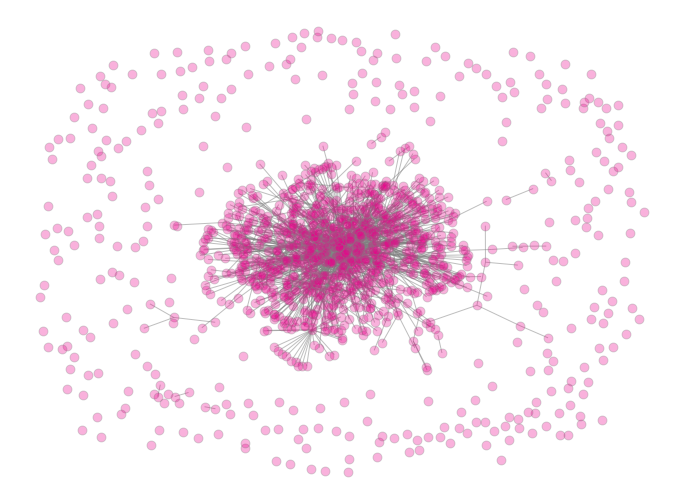

In [38]:
# More sophisticated graph drawing

plt.figure(figsize=(12,9)) # change the size of the figure
pos = nx.fruchterman_reingold_layout(G, iterations=10) # specify layout
# nodes
nx.draw_networkx_nodes(G, pos, node_size=80, node_color='#ec008c', edgecolors='grey', alpha=0.3)

# edges
nx.draw_networkx_edges(G, pos,
                       width=1, alpha=0.5, edge_color='grey')

# labels
#nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')

plt.axis('off')
plt.show()

In [59]:
node_size = [v * 3000 for v in degree_centrality.values()]

In [52]:
#Deleted nodes (i commented them as I discovered new ones)

#G.remove_node("facebook.com")
#G.remove_node("twitter.com")
#G.remove_node("linkedin.com")
#G.remove_node("mailto")
#G.remove_node("instagram.com")
#G.remove_node("youtube.com")
#G.remove_node("tel")
#G.remove_node("plus.google.com")
#G.remove_node("flickr.com")

In [64]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

In [65]:
degree_centrality_sorted[:10]

[('abc.net.au', 0.034817813765182185),
 ('aph.gov.au', 0.032388663967611336),
 ('dfat.gov.au', 0.025101214574898785),
 ('healthdirect.gov.au', 0.023481781376518216),
 ('myskills.gov.au', 0.022672064777327933),
 ('rdamoretonbay.org.au', 0.021052631578947368),
 ('communications.gov.au', 0.0194331983805668),
 ('atnf.csiro.au', 0.018623481781376516),
 ('sbs.com.au', 0.018623481781376516),
 ('health.gov.au', 0.018623481781376516)]

In [53]:
eigenvector = nx.eigenvector_centrality(G)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

In [54]:
eigenvector_sorted[:10]

[('aph.gov.au', 0.4765637158503656),
 ('abc.net.au', 0.29066580736875414),
 ('legislation.gov.au', 0.19157590493863083),
 ('health.gov.au', 0.1866765111870687),
 ('finance.gov.au', 0.18409977807036038),
 ('environment.gov.au', 0.15408778774435963),
 ('defence.gov.au', 0.15065859270299742),
 ('creativecommons.org', 0.14155060494876892),
 ('australia.gov.au', 0.13601861908835805),
 ('parlinfo.aph.gov.au', 0.1335998748596336)]

In [55]:
betweenness = nx.betweenness_centrality(G)
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

In [56]:
betweenness_sorted[:10]

[('aph.gov.au', 0.1334785741070521),
 ('abc.net.au', 0.07696672772852954),
 ('creativecommons.org', 0.06651995262212748),
 ('communications.gov.au', 0.06612374780273263),
 ('ato.gov.au', 0.043578101336668826),
 ('ifp.mychild.gov.au', 0.042456101591962836),
 ('australia.gov.au', 0.04141837915003106),
 ('myskills.gov.au', 0.03804557696969045),
 ('dfat.gov.au', 0.03725827471361052),
 ('bom.gov.au', 0.0301343601826106)]

In [57]:
closeness = nx.closeness_centrality(G)
closeness_sorted = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

In [58]:
closeness_sorted[:10]

[('aph.gov.au', 0.19632513235752103),
 ('creativecommons.org', 0.18269936917427737),
 ('abc.net.au', 0.1821038261382149),
 ('communications.gov.au', 0.1728390044577557),
 ('australia.gov.au', 0.17242409601084063),
 ('abs.gov.au', 0.17014844804318488),
 ('legislation.gov.au', 0.16826929851660352),
 ('environment.gov.au', 0.16715048669136015),
 ('dss.gov.au', 0.16643120290222155),
 ('dx.doi.org', 0.16615620091461047)]

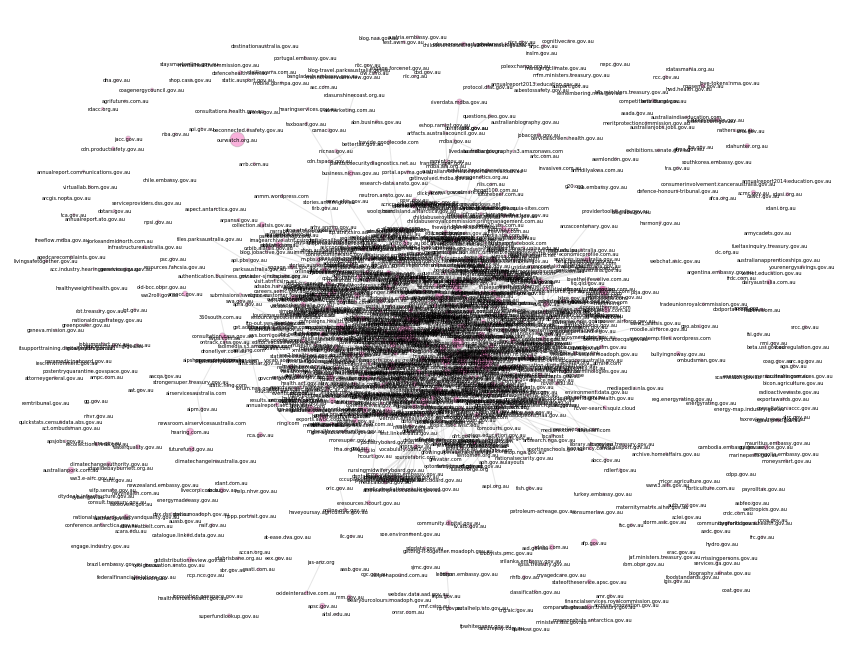

In [63]:
# More sophisticated graph drawing

plt.figure(figsize=(15,12)) # change the size of the figure
pos = nx.fruchterman_reingold_layout(G, iterations=10) # specify layout
# nodes
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='#ec008c', edgecolors='grey', alpha=0.3)

# edges
nx.draw_networkx_edges(G, pos,
                       width=1, alpha=0.2, edge_color='grey')

# labels
nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')

plt.axis('off')
plt.show()